# **Neural Networks - Forest Fires**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from keras import Sequential

In [2]:
# Read csv file 
df_forest = pd.read_csv('forestfires.csv')
df_forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## **EDA (Exploratory Data Analysis)**

In [3]:
df_forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

Note: Drop columns from 11th 'dayfri' to 29th 'monthsep'

In [4]:
df_temp = df_forest.iloc[:,0:11]
df_temp['size_category'] = df_forest['size_category']
df_temp.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [5]:
df_forest = df_temp

In [6]:
df_forest.shape

(517, 12)

In [7]:
# Check for null values
df_forest[df_forest.isna()].count()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [8]:
df_forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [9]:
df_forest.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
size_category     object
dtype: object

In [10]:
# Change object type columns to categorical
columns = ['month', 'day', 'size_category']

for x in columns:
  df_forest[x] = df_forest[x].astype('category')

df_forest.dtypes

month            category
day              category
FFMC              float64
DMC               float64
DC                float64
ISI               float64
temp              float64
RH                  int64
wind              float64
rain              float64
area              float64
size_category    category
dtype: object

### **Plots for Visual understanding of data**

In [11]:
# Correlation of given variables
df_forest.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


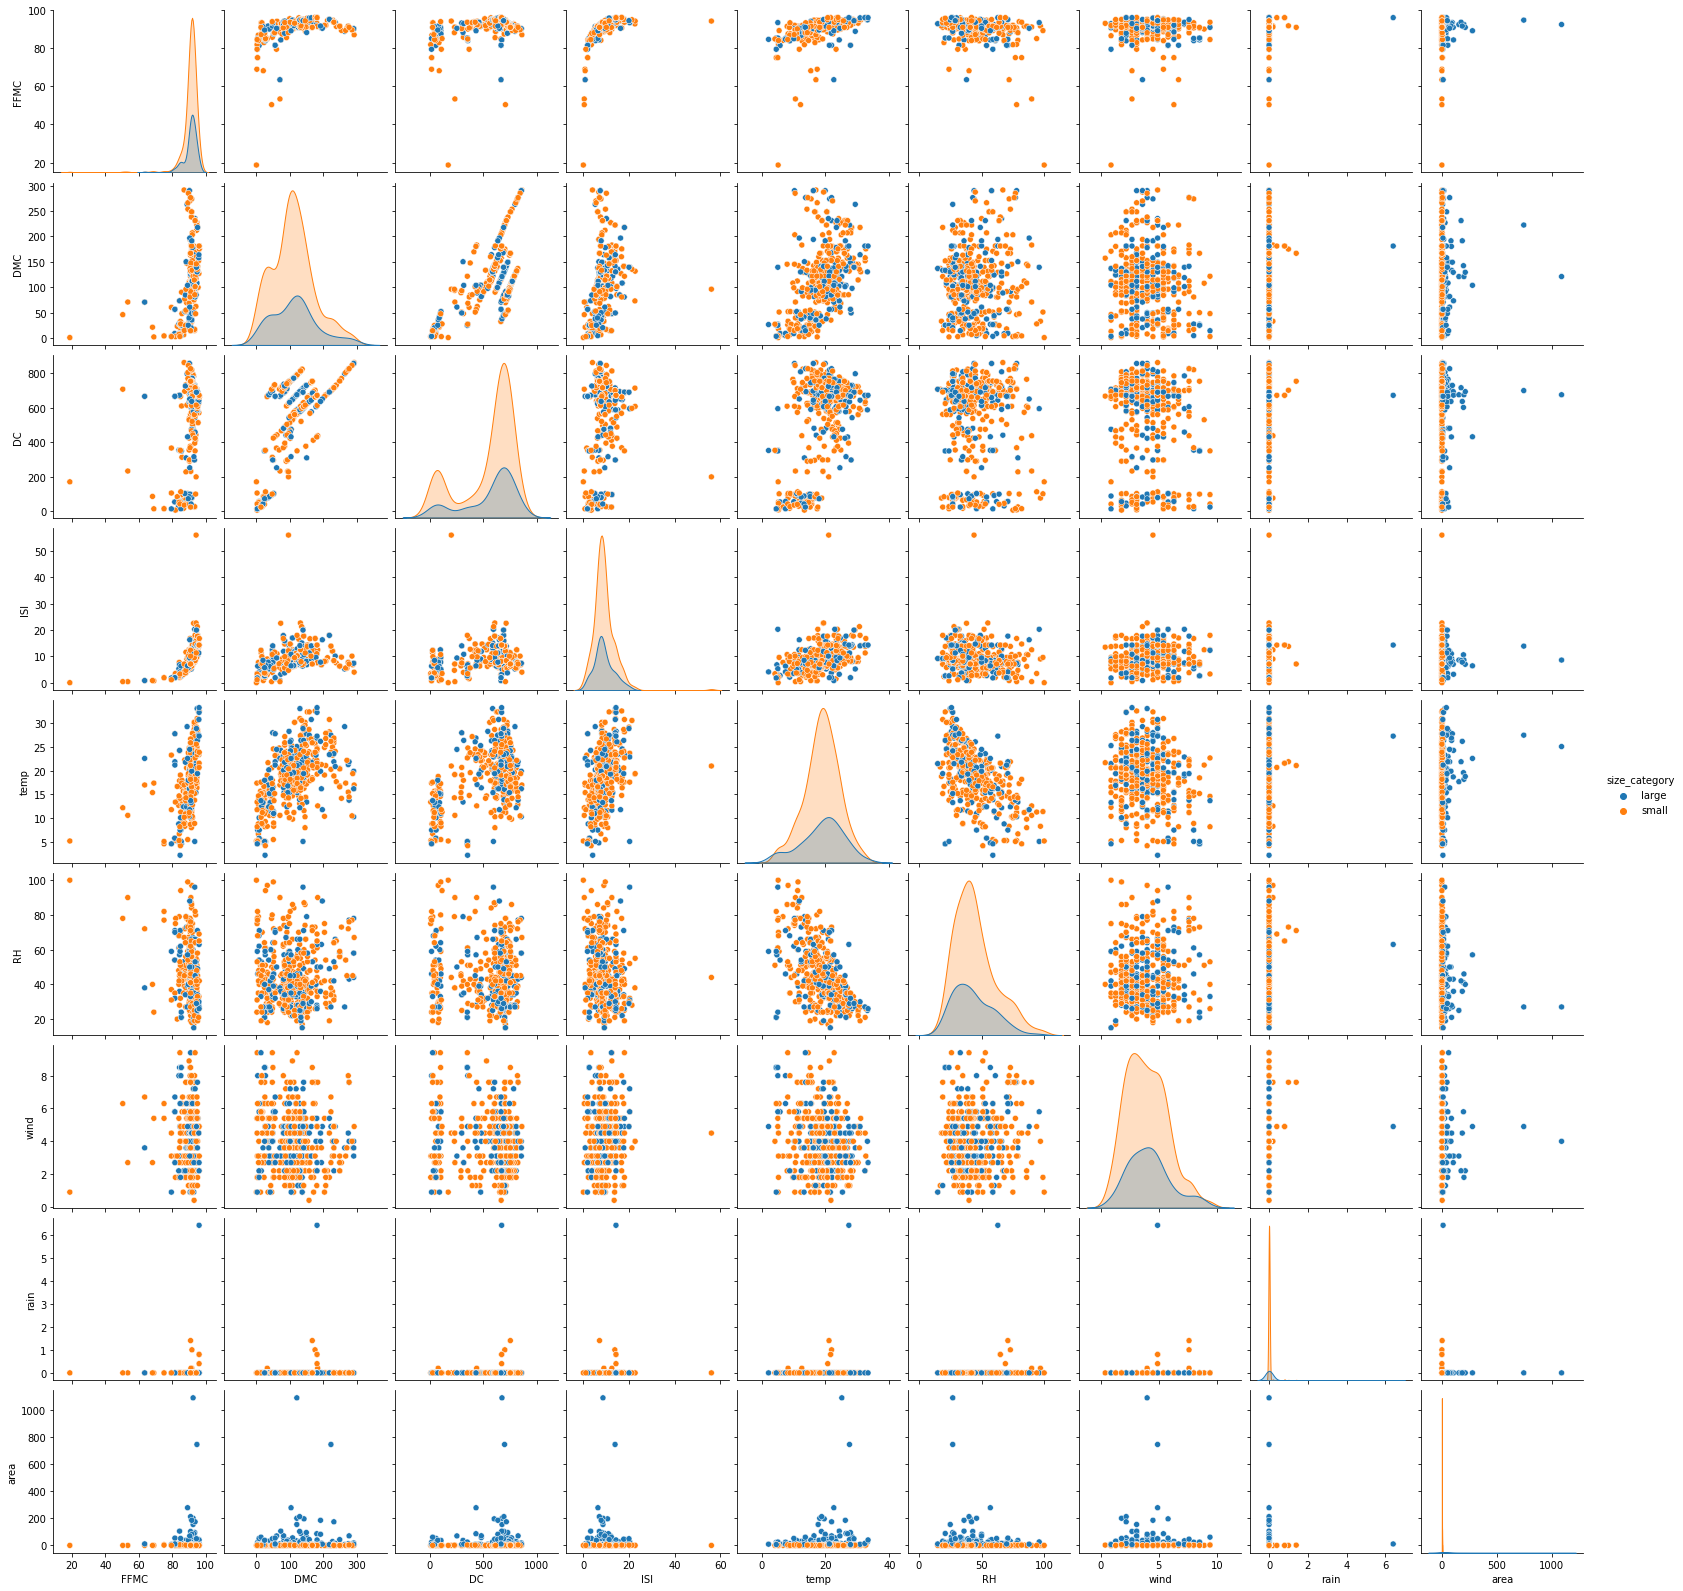

In [12]:
sns.pairplot(df_forest, hue='size_category')

Observation: Looks like good relation exists between input and output features.

In [13]:
# Value counts of output feature
df_forest['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


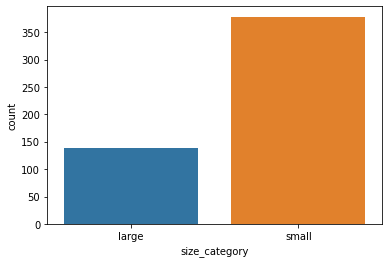

In [14]:
sns.countplot(df_forest['size_category'])

Observation: Good amount of data of both categories exists for model creation

In [15]:
# Separate out input and output features before model building
x = pd.get_dummies(df_forest.drop('size_category', axis=1))
print(x.head)
y = df_forest['size_category'].cat.codes
print('printing y now')
print(y.head)

<bound method NDFrame.head of      FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  month_apr  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00          0  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00          0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00          0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00          0  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00          0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...        ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44          0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29          0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16          0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00          0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00          0  ...   

     month_nov  month_oct  month_

In [16]:
print(x.shape)
print(y.shape)

(517, 28)
(517,)


In [17]:
x.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FFMC       517 non-null    float64
 1   DMC        517 non-null    float64
 2   DC         517 non-null    float64
 3   ISI        517 non-null    float64
 4   temp       517 non-null    float64
 5   RH         517 non-null    int64  
 6   wind       517 non-null    float64
 7   rain       517 non-null    float64
 8   area       517 non-null    float64
 9   month_apr  517 non-null    uint8  
 10  month_aug  517 non-null    uint8  
 11  month_dec  517 non-null    uint8  
 12  month_feb  517 non-null    uint8  
 13  month_jan  517 non-null    uint8  
 14  month_jul  517 non-null    uint8  
 15  month_jun  517 non-null    uint8  
 16  month_mar  517 non-null    uint8  
 17  month_may  517 non-null    uint8  
 18  month_nov  517 non-null    uint8  
 19  month_oct  517 non-null    uint8  
 20  month_sep 

In [19]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(387, 28)
(130, 28)
(387,)
(130,)


In [20]:
# Since various columns are of different numeric ranges, convert into Standard format
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
print(x_train_std[0:5])

x_test_std = scaler.fit_transform(x_test)
print(x_test_std[0:5])

[[-0.58843302 -1.32318052 -1.9881968  -1.1411328  -1.36443408  1.19003984
  -0.54745387 -0.08327409 -0.15330985  6.88294995 -0.74027022 -0.12549116
  -0.20766965 -0.05089866 -0.22722331 -0.18643862 -0.34891135 -0.05089866
  -0.05089866 -0.17888544 -0.7153452  -0.44929206  2.45690123 -0.44513191
  -0.45757513 -0.36273813 -0.37180007 -0.35816181]
 [-1.43279185 -1.57704557 -2.02570265 -1.49363439 -1.72845338  1.43390821
  -1.04621972 -0.08327409 -0.01854234 -0.14528654 -0.74027022 -0.12549116
   4.81534007 -0.05089866 -0.22722331 -0.18643862 -0.34891135 -0.05089866
  -0.05089866 -0.17888544 -0.7153452  -0.44929206 -0.40701677 -0.44513191
   2.18543346 -0.36273813 -0.37180007 -0.35816181]
 [-1.11615729 -1.31534518 -0.7718228  -1.38347764 -2.45649197 -1.43154514
   2.4451412  -0.08327409  0.04814674 -0.14528654 -0.74027022  7.96868873
  -0.20766965 -0.05089866 -0.22722331 -0.18643862 -0.34891135 -0.05089866
  -0.05089866 -0.17888544 -0.7153452  -0.44929206  2.45690123 -0.44513191
  -0.45757

## **Hyper Parameter Tuning - Neural Networks**

Param tuning is not producing results even after half an hour execution. So, the related section removed. 

Creating directly neural network model with good parameters.

## **Neural Networks Model Creation**

In [21]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

In [24]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) 
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Fitting the model

model.fit(x_train_std,y_train)

# Predicting using trained model

y_train_predict = model.predict(x_train_std)

# Printing the metrics
print(accuracy_score(y_train,y_train_predict))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


0.7803617571059431


In [25]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_train, y_train_predict)

array([[ 19,  84],
       [  1, 283]])

In [26]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.95      0.18      0.31       103
           1       0.77      1.00      0.87       284

    accuracy                           0.78       387
   macro avg       0.86      0.59      0.59       387
weighted avg       0.82      0.78      0.72       387



Observation: Model got created with 78% accuracy.

## **Model Evaluation with Test Data**

In [27]:
# Predicting using test data

y_test_predict = model.predict(x_test_std)

# Printing the metrics
print(accuracy_score(y_test,y_test_predict))

0.7615384615384615


In [28]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.17      0.28        36
           1       0.76      0.99      0.86        94

    accuracy                           0.76       130
   macro avg       0.81      0.58      0.57       130
weighted avg       0.78      0.76      0.70       130



In [29]:
confusion_matrix(y_test, y_test_predict)

array([[ 6, 30],
       [ 1, 93]])

**Observation: Model worked good with test data also with 76% accuracy.**